## Import the required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
import keras
from keras import Sequential # creates network in sequential form
from keras.layers import Dense,Dropout,BatchNormalization,Input  # creates fully connected layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from keras.initializers import Zeros,Ones,glorot_normal,glorot_uniform,he_normal,he_uniform,random_uniform,random_normal 
import keras_tuner as k 
import warnings
warnings.filterwarnings('ignore') 

Using TensorFlow backend


## Import the CSV file

In [2]:
df = pd.read_csv(r"C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\KERAS_TUNER_PROJECT\fitness_class_2212.csv") 

In [3]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


- The Data types of all the columns are correct except days_before column.
- weight column having 20 null values.

## Data Cleaning

In [5]:
df['days_before'] = df['days_before'].astype(str).str.replace('days', '', regex=True).astype(int)
df['day_of_week'] = df['day_of_week'].replace('Wednesday','Wed')
df['day_of_week'] = df['day_of_week'].replace('Monday','Mon')
df['day_of_week'] = df['day_of_week'].replace('Fri.','Fri') 
# df['category'] = df['category'].str.replace('-','NA') 
df['weight'] = df['weight'].apply(lambda x: round(float(x), 2)) 

In [6]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [7]:
# removing null values in the data
df= df.dropna() 

In [8]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [9]:
#df.to_csv('dataframe.csv', index=False) 

In [10]:
df = pd.read_csv("dataframe.csv") 

In [11]:
df 

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1475,1496,21,79.51,10,Fri,AM,HIIT,0
1476,1497,29,89.55,2,Mon,AM,Strength,0
1477,1498,9,87.38,4,Tue,AM,HIIT,0
1478,1499,34,68.64,14,Sun,AM,Aqua,0


- The 'days_before' column is converted to integers after removing 'days' from the values.
- The 'day_of_week' column is abbreviated for consistency (e.g., 'Wednesday' to 'Wed').
- Certain day abbreviations are corrected (e.g., 'Fri.' to 'Fri','Wednesday' to 'Wed', 'Monday' to 'Mon').
- The 'category' column is standardized by replacing hyphens with 'NA.'
- The 'weight' column is rounded to two decimal places for uniform precision.

##  EDA

# Analysing Features-Univariate
##### Non Viz
- Min
- Max
- Central Tendency
- Percentiles
- Dispersion

##### Viz
- Plot of Dist- Distribution
 

#### Analysing months_as_member feature-Univariate

In [12]:
# Non-vizualisation statistical analysis 
print("min of months_as_member:",df["months_as_member"].min())
print("max of months_as_member:",df["months_as_member"].max())
print("mean of months_as_member:",df["months_as_member"].mean())
print("median of months_as_member:",df["months_as_member"].median())
print("standard deviation of months_as_member:",df["months_as_member"].std()) 

min of months_as_member: 1
max of months_as_member: 148
mean of months_as_member: 15.659459459459459
median of months_as_member: 12.0
standard deviation of months_as_member: 12.971137866722273


<Axes: ylabel='Density'>

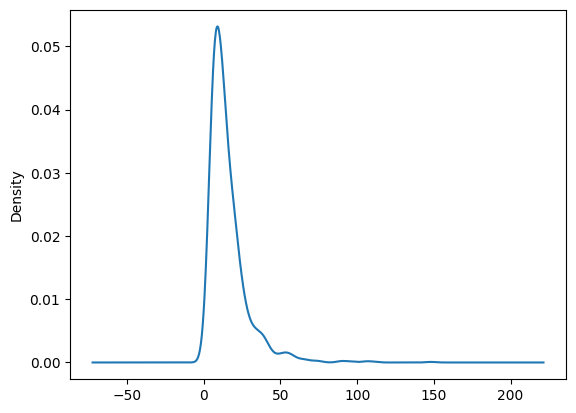

In [13]:
# plotting the distribution for months_as_member column
df["months_as_member"].plot(kind="kde")  

<Axes: ylabel='months_as_member'>

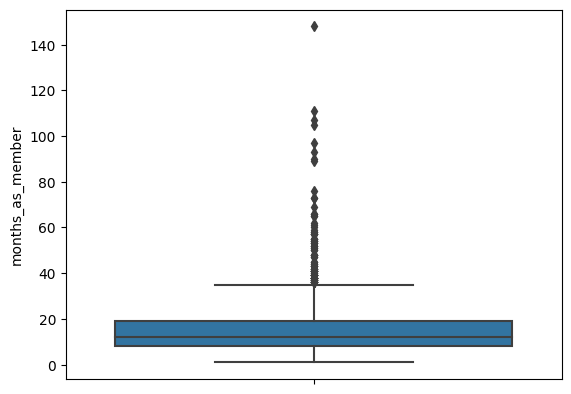

In [14]:
import seaborn as sns
sns.boxplot(data=df, y='months_as_member') 

In [15]:
median = df["months_as_member"].median()

# Calculate the interquartile range (IQR)
q1 = df["months_as_member"].quantile(0.25)
q3 = df["months_as_member"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the median
df.loc[df["months_as_member"] < lower_bound, "months_as_member"] = median
df.loc[df["months_as_member"] > upper_bound, "months_as_member"] = median

<Axes: ylabel='months_as_member'>

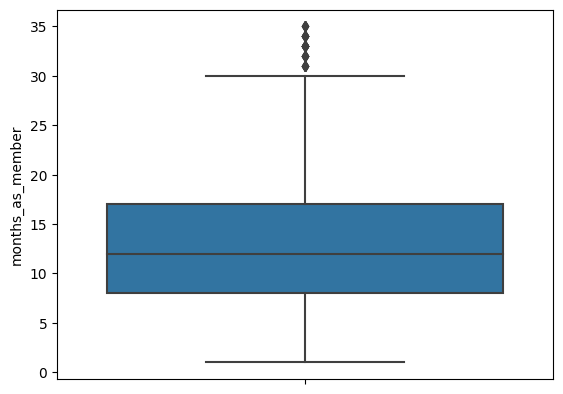

In [16]:
sns.boxplot(data=df, y='months_as_member') 

#### Analysing weight feature-Univariate

In [17]:
# Non-vizualisation statistical analysis 
print("min of weight:",df["weight"].min())
print("max of weight:",df["weight"].max())
print("mean of weight:",df["weight"].mean())
print("median of weight:",df["weight"].median())
print("standard deviation of weight:",df["weight"].std())  

min of weight: 55.41
max of weight: 170.52
mean of weight: 82.61037837837839
median of weight: 80.76
standard deviation of weight: 12.765859091428053


<Axes: ylabel='Density'>

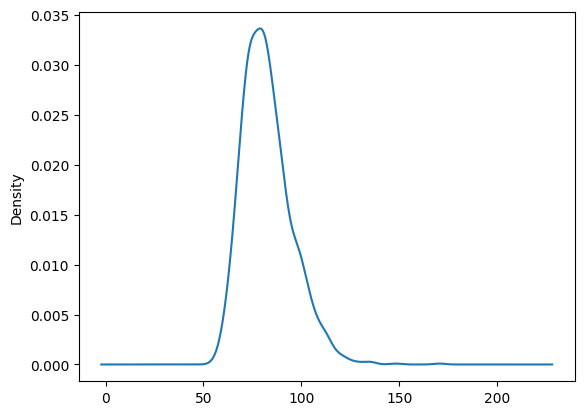

In [18]:
# plotting the distribution for weight column
df["weight"].plot(kind="kde")   

<Axes: ylabel='weight'>

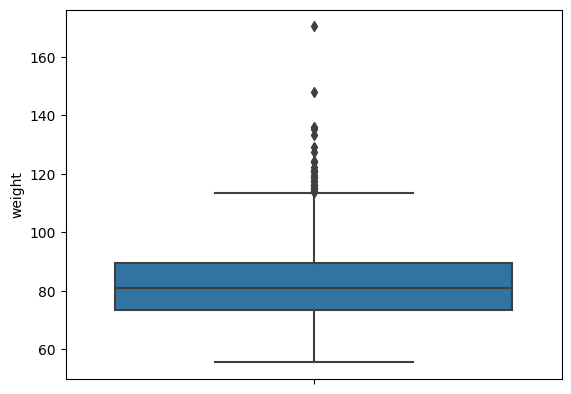

In [19]:
sns.boxplot(data=df, y='weight')  

In [20]:
median = df["weight"].median()

# Calculate the interquartile range (IQR)
q1 = df["weight"].quantile(0.25)
q3 = df["weight"].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with the median
df.loc[df["weight"] < lower_bound, "weight"] = median
df.loc[df["weight"] > upper_bound, "weight"] = median 

<Axes: ylabel='weight'>

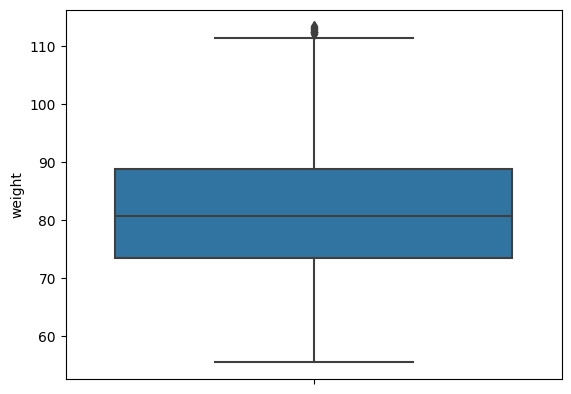

In [21]:
sns.boxplot(data=df, y='weight')   

#### Analysing days_before feature-Univariate 

In [22]:
# Non-vizualisation statistical analysis 
print("min of days_before:",df["days_before"].min())
print("max of days_before:",df["days_before"].max())
print("mean of days_before:",df["days_before"].mean())
print("median of days_before:",df["days_before"].median())
print("standard deviation of days_before:",df["days_before"].std())   

min of days_before: 1
max of days_before: 29
mean of days_before: 8.356081081081081
median of days_before: 9.0
standard deviation of days_before: 4.082097433001245


<Axes: ylabel='Density'>

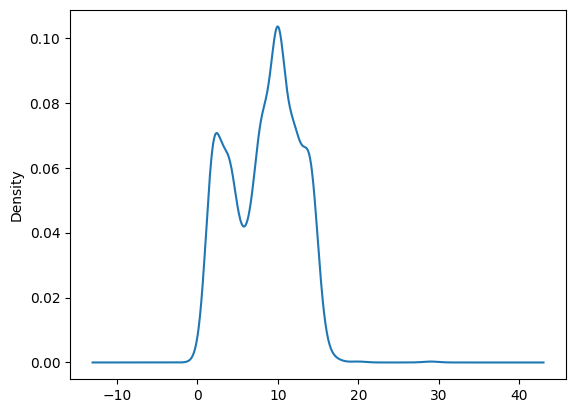

In [23]:
# plotting the distribution for weight column
df["days_before"].plot(kind="kde")  

<Axes: ylabel='days_before'>

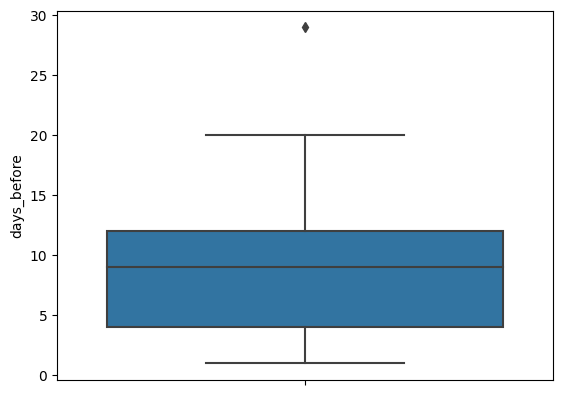

In [24]:
sns.boxplot(data=df, y='days_before')  

In [25]:
# removing outlier in the days_before column
df = df[df['days_before'] <= 20] 

<Axes: ylabel='days_before'>

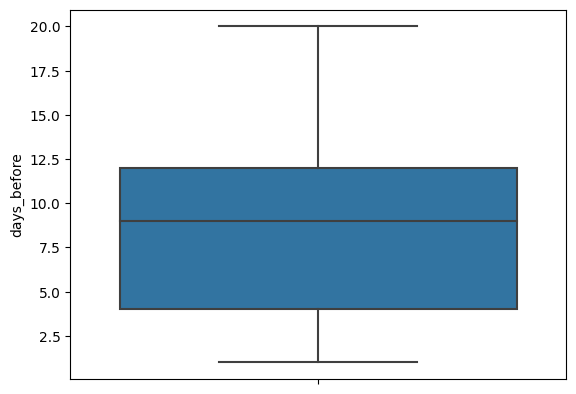

In [26]:
sns.boxplot(data=df, y='days_before')  

In [27]:
df 

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1475,1496,21,79.51,10,Fri,AM,HIIT,0
1476,1497,29,89.55,2,Mon,AM,Strength,0
1477,1498,9,87.38,4,Tue,AM,HIIT,0
1478,1499,34,68.64,14,Sun,AM,Aqua,0


#### Analysing day_of_week feature-Univariate 

In [28]:
# getting value_counts for day_of_wee feature
df["day_of_week"].value_counts() 

day_of_week
Fri    303
Thu    235
Mon    225
Sun    210
Sat    200
Tue    192
Wed    114
Name: count, dtype: int64

<Axes: xlabel='day_of_week', ylabel='count'>

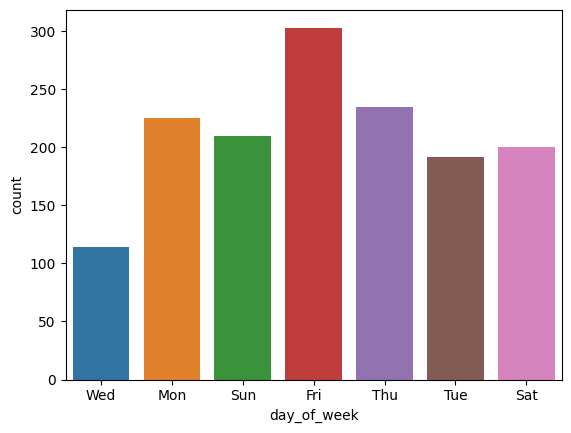

In [29]:
 sns.countplot(x='day_of_week',data=df)  

#### Analysing time feature-Univariate

In [30]:
df['time'].value_counts() 

time
AM    1130
PM     349
Name: count, dtype: int64

<Axes: xlabel='time', ylabel='count'>

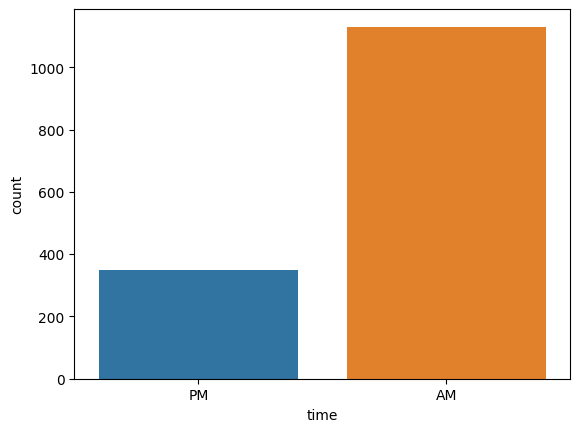

In [31]:
 sns.countplot(x='time',data=df) 

#### Analysing category feature-Univariate

In [32]:
df['category'].value_counts() 

category
HIIT        657
Cycling     370
Strength    230
Yoga        135
Aqua         74
-            13
Name: count, dtype: int64

In [33]:
df['category'] = df['category'].str.replace('-','NA') 

<Axes: xlabel='category', ylabel='count'>

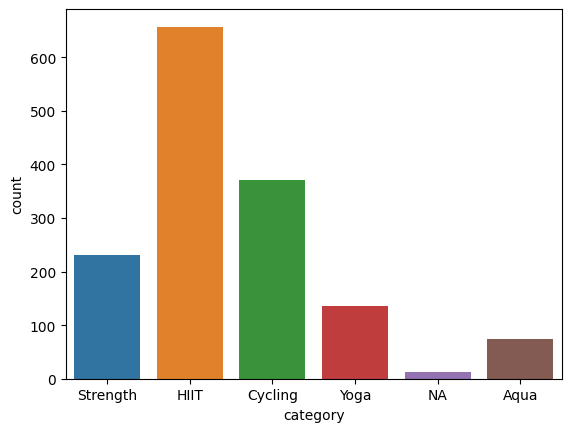

In [34]:
sns.countplot(x='category',data=df)  

#### Analysing attended feature-Univariate 

<Axes: xlabel='attended', ylabel='count'>

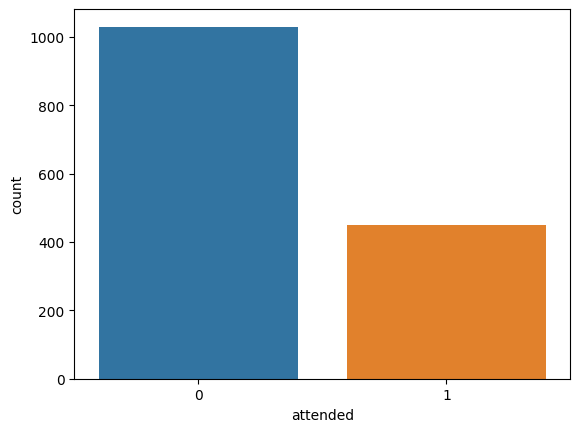

In [35]:
 sns.countplot(x='attended',data=df)

## Bivariate Analysis

### Analysing relationship between target variable(attended) and reamining  features.

#### Analysing relationship between attended and months_as_member features 

<Axes: xlabel='months_as_member', ylabel='attended'>

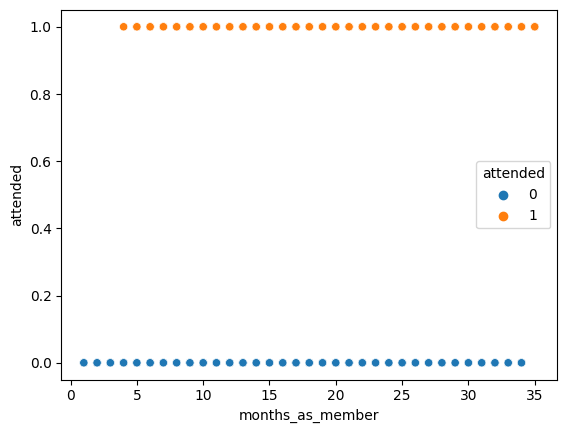

In [36]:
sns.scatterplot(data=df, x='months_as_member', y='attended', hue='attended') 

#### Analysing relationship between attended and weight features 

<Axes: xlabel='weight', ylabel='attended'>

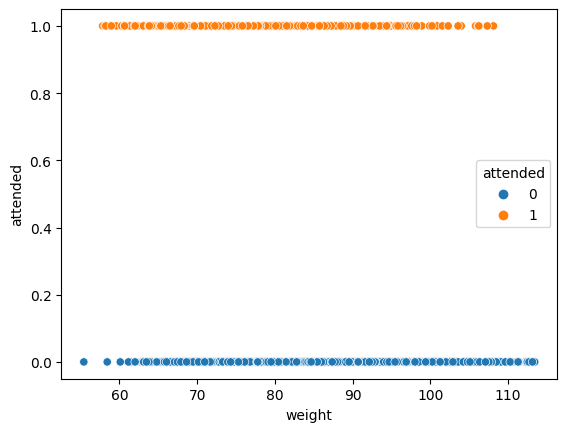

In [37]:
sns.scatterplot(data=df, x='weight', y='attended', hue='attended') 

#### Analysing relationship between attended and days_before features 

<Axes: xlabel='days_before', ylabel='attended'>

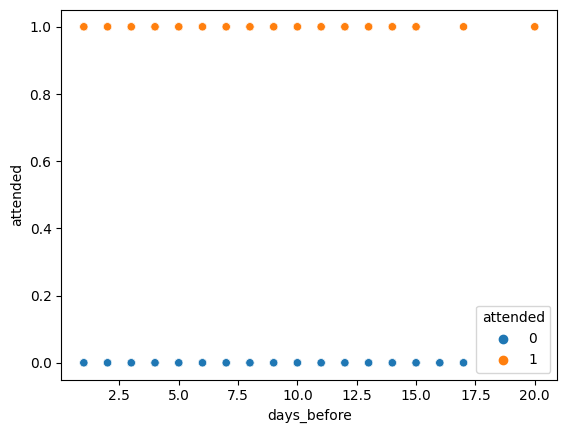

In [38]:
sns.scatterplot(data=df, x='days_before', y='attended', hue='attended')  

#### Analysing relationship between attended and days_of_week features

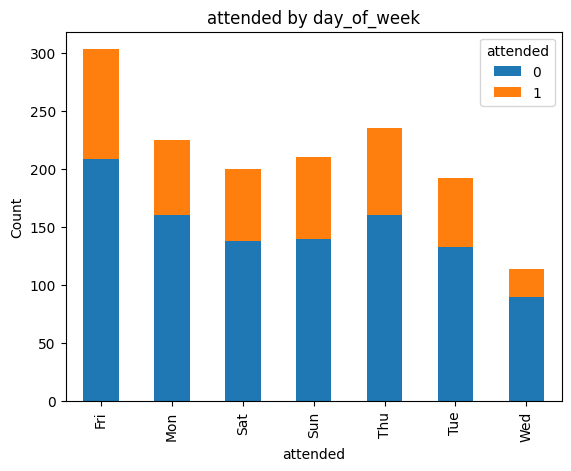

In [39]:
# Counting the occurrences of each combination
count_df = df.groupby(['attended', 'day_of_week']).size().reset_index(name='count')

# Reshaping the data for stacked bar plot
stacked_df = count_df.pivot(index='day_of_week', columns='attended', values='count')

# Creating the stacked bar plot
stacked_df.plot(kind='bar', stacked=True)

# Adding labels and titles
plt.xlabel('attended')
plt.ylabel('Count')
plt.title('attended by day_of_week')

# Display the plot  
plt.show() 

#### Analysing relationship between attended and time features

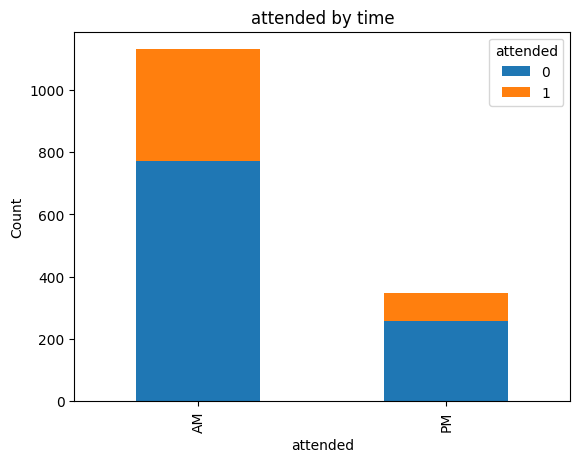

In [40]:
# Counting the occurrences of each combination
count_df = df.groupby(['attended', 'time']).size().reset_index(name='count')

# Reshaping the data for stacked bar plot
stacked_df = count_df.pivot(index='time', columns='attended', values='count')

# Creating the stacked bar plot
stacked_df.plot(kind='bar', stacked=True)

# Adding labels and titles
plt.xlabel('attended')
plt.ylabel('Count')
plt.title('attended by time')

# Display the plot  
plt.show() 

#### Analysing relationship between attended and category features

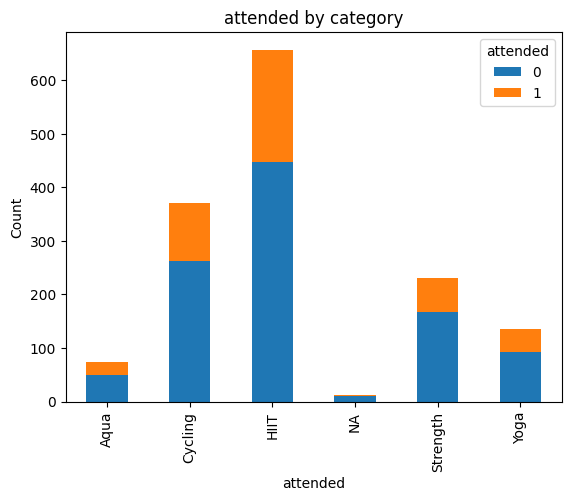

In [41]:
# Counting the occurrences of each combination
count_df = df.groupby(['attended', 'category']).size().reset_index(name='count')

# Reshaping the data for stacked bar plot
stacked_df = count_df.pivot(index='category', columns='attended', values='count')

# Creating the stacked bar plot
stacked_df.plot(kind='bar', stacked=True)

# Adding labels and titles
plt.xlabel('attended')
plt.ylabel('Count')
plt.title('attended by category')

# Display the plot   
plt.show()

## Model Building 

In [42]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1480 non-null   int64  
 1   months_as_member  1480 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1480 non-null   int64  
 4   day_of_week       1480 non-null   object 
 5   time              1480 non-null   object 
 6   category          1480 non-null   object 
 7   attended          1480 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.6+ KB


In [43]:
x=df.iloc[:,0:7]
y=df.iloc[:,-1]  

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20) 

In [45]:
x_train.shape 

(1184, 7)

In [46]:
x_test.shape  

(296, 7)

## Data Preprocessing

### separating Numerical and categorical columns 

In [47]:
# categorical coulmns
x_train_cat = x_train.select_dtypes(include=['object'])

x_train_cat.head()  

,day_of_week,time,category
1103,Thu,AM,Cycling
405,Sat,PM,HIIT
693,Sun,AM,Cycling
335,Mon,AM,Yoga
587,Fri,AM,HIIT


In [48]:
# Numerical columns
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])

x_train_num.head()  

,booking_id,months_as_member,weight,days_before
1103,1119,3,127.59,8
405,410,10,85.31,12
693,701,10,82.74,14
335,339,13,71.22,3
587,594,48,65.02,10


## Preprocessing the Train_data

### Scaling the Numerical columns

In [49]:
x_train_num.head()  

,booking_id,months_as_member,weight,days_before
1103,1119,3,127.59,8
405,410,10,85.31,12
693,701,10,82.74,14
335,339,13,71.22,3
587,594,48,65.02,10


In [50]:
# scaling the numerical features using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_rescaled.head() 

,booking_id,months_as_member,weight,days_before
1103,0.858140,-0.972225,3.497808,-0.098481
405,-0.768126,-0.428734,0.204046,0.895990
693,-0.100646,-0.428734,0.003834,1.393226
335,-0.930982,-0.195809,-0.893615,-1.341570
587,-0.346077,2.521648,-1.376617,0.398754


In [51]:
# checking mean,median,standard deviation of numerical columns after rescaling
x_train_num.describe() 

,booking_id,months_as_member,weight,days_before
count,1184.000000,1184.000000,1184.000000,1184.000000
mean,744.878378,15.521959,82.690785,8.396115
std,436.152050,12.885130,12.841809,4.023937
min,1.000000,1.000000,55.410000,1.000000
25%,365.750000,8.000000,73.410000,4.000000
50%,743.000000,12.000000,81.125000,9.500000
75%,1129.250000,19.000000,89.687500,12.000000
max,1500.000000,148.000000,170.520000,20.000000


In [52]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
x_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                               columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)

x_train_cat_OneEnc.head()   

,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_NA,category_Strength,category_Yoga
1103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
405,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
693,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Concatinating the Categorical Features and Numerical Features: 

In [53]:
x_train_transform = pd.concat([x_train_num_rescaled,x_train_cat_OneEnc], axis=1)

x_train_transform.head()  

,booking_id,months_as_member,weight,days_before,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_NA,category_Strength,category_Yoga
1103,0.858140,-0.972225,3.497808,-0.098481,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
405,-0.768126,-0.428734,0.204046,0.895990,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
693,-0.100646,-0.428734,0.003834,1.393226,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
335,-0.930982,-0.195809,-0.893615,-1.341570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
587,-0.346077,2.521648,-1.376617,0.398754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Preprocessing the Test_data 

In [54]:
x_test.head()  

,booking_id,months_as_member,weight,days_before,day_of_week,time,category
615,622,4,117.81,2,Mon,AM,Yoga
946,959,7,97.28,4,Tue,PM,Aqua
848,859,5,112.43,3,Tue,PM,HIIT
1472,1493,18,74.32,6,Wed,PM,HIIT
1432,1453,17,67.91,12,Sat,AM,Strength


In [55]:
# separating categorical columns
x_test_cat = x_test.select_dtypes(include=['object'])

x_test_cat.head() 

,day_of_week,time,category
615,Mon,AM,Yoga
946,Tue,PM,Aqua
848,Tue,PM,HIIT
1472,Wed,PM,HIIT
1432,Sat,AM,Strength


In [56]:
# separarting numerical columns of test data
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

x_test_num.head()   

,booking_id,months_as_member,weight,days_before
615,622,4,117.81,2
946,959,7,97.28,4
848,859,5,112.43,3
1472,1493,18,74.32,6
1432,1453,17,67.91,12


In [57]:
# rescaling numerical columns of test data
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_rescaled.head() 

,booking_id,months_as_member,weight,days_before
615,-0.281852,-0.894584,2.735912,-1.590188
946,0.491141,-0.661659,1.136552,-1.092952
848,0.261766,-0.816942,2.316790,-1.341570
1472,1.716002,0.192399,-0.652114,-0.595717
1432,1.624252,0.114757,-1.151476,0.895990


In [58]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(drop='first', sparse=False)

x_test_cat_OneEnc = pd.DataFrame(encoder.transform(x_test_cat), 
                               columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)

x_test_cat_OneEnc.head() 

,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_NA,category_Strength,category_Yoga
615,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
946,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
848,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1472,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concatinating Numerical and categorical columns

In [59]:
x_test_transform = pd.concat([x_test_num_rescaled,x_test_cat_OneEnc ], axis=1)

x_test_transform.head() 

,booking_id,months_as_member,weight,days_before,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_NA,category_Strength,category_Yoga
615,-0.281852,-0.894584,2.735912,-1.590188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
946,0.491141,-0.661659,1.136552,-1.092952,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
848,0.261766,-0.816942,2.316790,-1.341570,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1472,1.716002,0.192399,-0.652114,-0.595717,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1432,1.624252,0.114757,-1.151476,0.895990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Balancing the Data

In [60]:
from imblearn.over_sampling import SMOTE 

In [61]:
s=SMOTE()

In [62]:
x_train,y_train=s.fit_resample(x_train_transform,y_train)  

In [63]:
y_train.value_counts() 

attended
0    826
1    826
Name: count, dtype: int64

## Building Logical Structure

In [64]:
import keras_tuner as kt

from keras import Sequential
from keras.layers import Dense, Input 

##### Step-1: creating a fucntion

In [65]:
# def modelss(hp):
#     model=Sequential()
#     model.add(Input(shape=(4,)))
#     model.add(Dense(units=hp.Int("neurons",min_value=4,max_value=100,step=1),activation=hp.Choice("activation",values=["sigmoid","tanh","relu"]),kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
#     model.add(Dense(3,activation="softmax"))
#     model.compile(optimizer='sgd',loss="sparse_categorical_crossentropy",metrics=["accuracy"]) 
#     return model

In [66]:
def best_model(hp):
    model=Sequential()
    model.add(Input(shape=(x_train_transform.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation=hp.Choice("activation",values=["sigmoid","tanh","relu"]),kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
            
    model.add(Dense(1,activation="sigmoid"))
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer_choice, metrics=['accuracy'])
    return model  

##### Step-2: calling function using tuner() 

In [67]:
tuner=kt.RandomSearch(best_model,objective="val_accuracy",max_trials=5,directory=r"C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\KERAS_TUNER_PROJECT\keras_project",project_name="list_of_models")

Reloading Tuner from C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\KERAS_TUNER_PROJECT\keras_project\list_of_models\tuner0.json


In [68]:
x_train.shape 

(1652, 16)

In [69]:
y_train.shape 

(1652,)

### Step-3: Training

In [70]:
tuner.search(x_train,y_train,epochs=15,validation_data=(x_test_transform,y_test)) 

In [71]:
tuner.search_space_summary()

Search space summary
Default search space size: 13
hiddenlayers (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'tanh', 'relu'], 'ordered': False}
weight_init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'], 'ordered': False}
neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 15, 'step': 1, 'sampling': 'linear'}
neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 1

In [72]:
tuner.results_summary()

Results summary
Results in C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\KERAS_TUNER_PROJECT\keras_project\list_of_models
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
hiddenlayers: 9
neurons0: 5
activation: tanh
weight_init: glorot_normal
neurons1: 10
neurons2: 8
neurons3: 8
neurons4: 13
optimizer: adam
neurons5: 12
neurons6: 1
neurons7: 1
neurons8: 1
Score: 0.712837815284729

Trial 2 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 9
activation: sigmoid
weight_init: he_normal
neurons1: 3
neurons2: 6
neurons3: 12
neurons4: 5
optimizer: sgd
neurons5: 14
Score: 0.7060810923576355

Trial 4 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 8
activation: sigmoid
weight_init: glorot_uniform
neurons1: 13
neurons2: 10
neurons3: 3
neurons4: 6
optimizer: rmsprop
neurons5: 2
neurons6: 12
neurons7: 1
neurons8: 14
Score: 0.7060810923576355

Trial 0 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 8
activation: sigmoid
weight_i

In [73]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 9,
 'neurons0': 5,
 'activation': 'tanh',
 'weight_init': 'glorot_normal',
 'neurons1': 10,
 'neurons2': 8,
 'neurons3': 8,
 'neurons4': 13,
 'optimizer': 'adam',
 'neurons5': 12,
 'neurons6': 1,
 'neurons7': 1,
 'neurons8': 1}

In [74]:
fmodel = tuner.get_best_models(num_models=1)[0]

In [75]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 85        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 13)                117       
                                                                 
 dense_5 (Dense)             (None, 12)                168       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [76]:
hist=fmodel.fit(x_train,y_train,batch_size=10,epochs=10,validation_split=0.15)

Epoch 1/10
141/141 [==============================] - 4s 7ms/step - loss: 0.6137 - accuracy: 0.7030 - val_loss: 0.7100 - val_accuracy: 0.6089
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5922 - accuracy: 0.7251 - val_loss: 0.7071 - val_accuracy: 0.6290
Epoch 3/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5799 - accuracy: 0.7293 - val_loss: 0.6418 - val_accuracy: 0.7419
Epoch 4/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5674 - accuracy: 0.7422 - val_loss: 0.6915 - val_accuracy: 0.6653
Epoch 5/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5631 - accuracy: 0.7358 - val_loss: 0.6905 - val_accuracy: 0.6855
Epoch 6/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5566 - accuracy: 0.7315 - val_loss: 0.6600 - val_accuracy: 0.7298
Epoch 7/10
141/141 [==============================] - 1s 4ms/step - loss: 0.5492 - accuracy: 0.7457 - val_loss: 0.6652 - val_accuracy: 0.7177
Epoch 

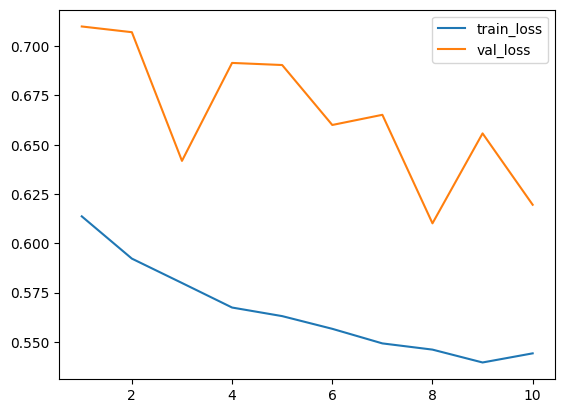

In [77]:
plt.plot(range(1,11),hist.history["loss"],label="train_loss")
plt.plot(range(1,11),hist.history["val_loss"],label="val_loss")
plt.legend()

In [78]:
hist.history['val_loss']

[0.7100140452384949,
 0.7071113586425781,
 0.6418280005455017,
 0.6915291547775269,
 0.6904589533805847,
 0.6600436568260193,
 0.6652026176452637,
 0.6101443767547607,
 0.6557736396789551,
 0.6195664405822754]

In [80]:
predicted=fmodel.predict(x_test_transform)   

10/10 [==============================] - 0s 4ms/step


In [81]:
predicted=np.where(predicted>0.5,1,0)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [83]:
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.793918918918919


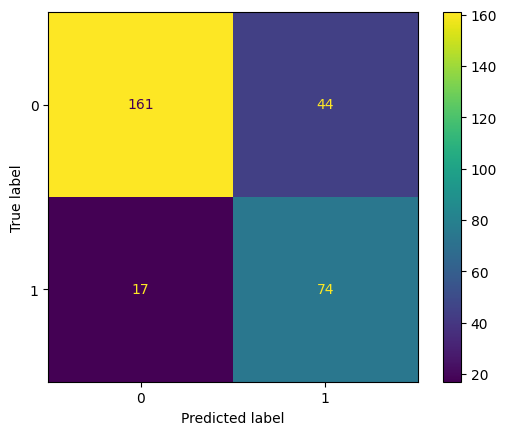

In [84]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()